In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style="whitegrid", palette="Set2")  
BASE_PALETTE = sns.color_palette()

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "grid.alpha": 0.4,
    "grid.linestyle": "--"
})

Loading the dataset

In [2]:
df = pd.read_csv('data/Original.csv')
df.head(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.00          1080.90     Strength       26.800377   
1                      1.37          1809.91         HIIT       27.655021   
2                      0.91           802.26       Cardio       24.320821   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                   1.50                           3.99              2.01   
1                   1.90                           4.00              2.01   
2                   1.88                           2.99              1.02   

     BMI  Daily meals frequency  Physical exercise   Carbs  Proteins   Fats  \
0  24.87                   2.99               0.01  267.68    106.05  71.63   
1  23.48                   3.01               0.97  214.32     85.41  56.97   
2  21.15                   1.99              -0.02  246.04     98.11  65.48   

   Calories meal_name  meal_type   diet_type  sugar_g  sodium_mg  \
0    1806.0     Other      Lunch       Vegan    31.77    1729.94   
1    1577.0     Other      Lunch  Vegetarian    12.34     693.08   
2    1608.0     Other  Breakfast       Paleo    42.81    2142.48   

   cholesterol_mg  serving_size_g cooking_method  prep_time_min  \
0          285.05          120.47        Grilled          16.24   
1          300.61          109.15          Fried          16.47   
2          215.42          399.43         Boiled          54.35   

   cook_time_min  rating  Name of Exercise  Sets   Reps  \
0         110.79    1.31  Decline Push-ups  4.99  20.91   
1          12.01    1.92       Bear Crawls  4.01  16.15   
2           6.09    4.70              Dips  5.00  21.90   

                                Benefit  Burns Calories (per 30 min)  \
0  Improves shoulder health and posture                       342.58   
1                 Strengthens lower abs                       357.16   
2                 Builds chest strength                       359.63   

     Target Muscle Group Equipment Needed Difficulty Level Body Part  \
0     Shoulders, Triceps    Cable Machine         Advanced      Legs   
1  Back, Core, Shoulders      Step or Box     Intermediate     Chest   
2     Quadriceps, Glutes      Step or Box     Intermediate      Arms   

  Type of Muscle               Workout   BMI_calc  cal_from_macros  pct_carbs  \
0           Lats        Dumbbell flyes  24.870447          2139.59   0.500432   
1           Lats        Lateral raises  23.479709          1711.65   0.500850   
2  Grip Strength  Standing calf raises  21.148123          1965.92   0.500610   

   protein_per_kg   pct_HRR  pct_maxHR  cal_balance  lean_mass_kg  \
0        1.624789  0.741237   0.835985       725.10     47.777394   
1        1.514093  0.551247   0.734270      -232.91     40.809803   
2        1.663445  0.574534   0.708124       805.74     44.635580   

   expected_burn  Burns Calories (per 30 min)_bc Burns_Calories_Bin  
0       685.1600                    7.260425e+19             Medium  
1       978.6184                    1.020506e+20               High  
2       654.5266                    1.079607e+20               High

In [3]:
df = df.rename(columns={
    "Workout_Frequency (days/week)": "Workout_Frequency (days)"
})
df.head(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.00          1080.90     Strength       26.800377   
1                      1.37          1809.91         HIIT       27.655021   
2                      0.91           802.26       Cardio       24.320821   

   Water_Intake (liters)  Workout_Frequency (days)  Experience_Level    BMI  \
0                   1.50                      3.99              2.01  24.87   
1                   1.90                      4.00              2.01  23.48   
2                   1.88                      2.99              1.02  21.15   

   Daily meals frequency  Physical exercise   Carbs  Proteins   Fats  \
0                   2.99               0.01  267.68    106.05  71.63   
1                   3.01               0.97  214.32     85.41  56.97   
2                   1.99              -0.02  246.04     98.11  65.48   

   Calories meal_name  meal_type   diet_type  sugar_g  sodium_mg  \
0    1806.0     Other      Lunch       Vegan    31.77    1729.94   
1    1577.0     Other      Lunch  Vegetarian    12.34     693.08   
2    1608.0     Other  Breakfast       Paleo    42.81    2142.48   

   cholesterol_mg  serving_size_g cooking_method  prep_time_min  \
0          285.05          120.47        Grilled          16.24   
1          300.61          109.15          Fried          16.47   
2          215.42          399.43         Boiled          54.35   

   cook_time_min  rating  Name of Exercise  Sets   Reps  \
0         110.79    1.31  Decline Push-ups  4.99  20.91   
1          12.01    1.92       Bear Crawls  4.01  16.15   
2           6.09    4.70              Dips  5.00  21.90   

                                Benefit  Burns Calories (per 30 min)  \
0  Improves shoulder health and posture                       342.58   
1                 Strengthens lower abs                       357.16   
2                 Builds chest strength                       359.63   

     Target Muscle Group Equipment Needed Difficulty Level Body Part  \
0     Shoulders, Triceps    Cable Machine         Advanced      Legs   
1  Back, Core, Shoulders      Step or Box     Intermediate     Chest   
2     Quadriceps, Glutes      Step or Box     Intermediate      Arms   

  Type of Muscle               Workout   BMI_calc  cal_from_macros  pct_carbs  \
0           Lats        Dumbbell flyes  24.870447          2139.59   0.500432   
1           Lats        Lateral raises  23.479709          1711.65   0.500850   
2  Grip Strength  Standing calf raises  21.148123          1965.92   0.500610   

   protein_per_kg   pct_HRR  pct_maxHR  cal_balance  lean_mass_kg  \
0        1.624789  0.741237   0.835985       725.10     47.777394   
1        1.514093  0.551247   0.734270      -232.91     40.809803   
2        1.663445  0.574534   0.708124       805.74     44.635580   

   expected_burn  Burns Calories (per 30 min)_bc Burns_Calories_Bin  
0       685.1600                    7.260425e+19             Medium  
1       978.6184                    1.020506e+20               High  
2       654.5266                    1.079607e+20               High

Drop the following columns as they are not from original dataset.

In [4]:
df = df.drop(columns=[
    "BMI_calc", "cal_from_macros", "pct_carbs", "protein_per_kg",
    "pct_HRR", "pct_maxHR", "cal_balance", "lean_mass_kg",
    "expected_burn", "Burns Calories (per 30 min)_bc", "Burns_Calories_Bin"
])


In [5]:
df.shape

(20000, 43)

In [6]:
df.head(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.00          1080.90     Strength       26.800377   
1                      1.37          1809.91         HIIT       27.655021   
2                      0.91           802.26       Cardio       24.320821   

   Water_Intake (liters)  Workout_Frequency (days)  Experience_Level    BMI  \
0                   1.50                      3.99              2.01  24.87   
1                   1.90                      4.00              2.01  23.48   
2                   1.88                      2.99              1.02  21.15   

   Daily meals frequency  Physical exercise   Carbs  Proteins   Fats  \
0                   2.99               0.01  267.68    106.05  71.63   
1                   3.01               0.97  214.32     85.41  56.97   
2                   1.99              -0.02  246.04     98.11  65.48   

   Calories meal_name  meal_type   diet_type  sugar_g  sodium_mg  \
0    1806.0     Other      Lunch       Vegan    31.77    1729.94   
1    1577.0     Other      Lunch  Vegetarian    12.34     693.08   
2    1608.0     Other  Breakfast       Paleo    42.81    2142.48   

   cholesterol_mg  serving_size_g cooking_method  prep_time_min  \
0          285.05          120.47        Grilled          16.24   
1          300.61          109.15          Fried          16.47   
2          215.42          399.43         Boiled          54.35   

   cook_time_min  rating  Name of Exercise  Sets   Reps  \
0         110.79    1.31  Decline Push-ups  4.99  20.91   
1          12.01    1.92       Bear Crawls  4.01  16.15   
2           6.09    4.70              Dips  5.00  21.90   

                                Benefit  Burns Calories (per 30 min)  \
0  Improves shoulder health and posture                       342.58   
1                 Strengthens lower abs                       357.16   
2                 Builds chest strength                       359.63   

     Target Muscle Group Equipment Needed Difficulty Level Body Part  \
0     Shoulders, Triceps    Cable Machine         Advanced      Legs   
1  Back, Core, Shoulders      Step or Box     Intermediate     Chest   
2     Quadriceps, Glutes      Step or Box     Intermediate      Arms   

  Type of Muscle               Workout  
0           Lats        Dumbbell flyes  
1           Lats        Lateral raises  
2  Grip Strength  Standing calf raises

In [7]:
df.describe().T

count         mean         std         min  \
Age                          20000.0    38.851453   12.114580   18.000000   
Weight (kg)                  20000.0    73.898832   21.173010   39.180000   
Height (m)                   20000.0     1.723093    0.127033    1.490000   
Max_BPM                      20000.0   179.889702   11.510805  159.310000   
Avg_BPM                      20000.0   143.704306   14.267688  119.070000   
Resting_BPM                  20000.0    62.195813    7.289351   49.490000   
Session_Duration (hours)     20000.0     1.259446    0.341336    0.490000   
Calories_Burned              20000.0  1280.109600  502.228982  323.110000   
Fat_Percentage               20000.0    26.101313    4.996160   11.333134   
Water_Intake (liters)        20000.0     2.627485    0.604724    1.460000   
Workout_Frequency (days)     20000.0     3.318629    0.911198    1.940000   
Experience_Level             20000.0     1.809176    0.736204    1.000000   
BMI                          20000.0    24.921680    6.701126   12.040000   
Daily meals frequency        20000.0     2.864804    0.636649    1.950000   
Physical exercise            20000.0     0.452503    0.986628   -0.070000   
Carbs                        20000.0   249.778592   55.108623  137.720000   
Proteins                     20000.0    99.918290   22.043670   55.170000   
Fats                         20000.0    66.612172   14.699284   36.590000   
Calories                     20000.0  2024.418300  541.891521  781.000000   
sugar_g                      20000.0    24.531042   14.446105   -0.670000   
sodium_mg                    20000.0  1258.139709  716.618987   19.220000   
cholesterol_mg               20000.0   148.465602   87.382817   -3.890000   
serving_size_g               20000.0   302.719499  115.711949   95.950000   
prep_time_min                20000.0    33.517447   16.526869    3.950000   
cook_time_min                20000.0    61.502164   33.579746    3.350000   
rating                       20000.0     2.989303    1.157692    0.930000   
Sets                         20000.0     4.425059    0.579596    2.960000   
Reps                         20000.0    19.427316    3.679707    4.850000   
Burns Calories (per 30 min)  20000.0   344.046515   32.138782  128.750000   

                                     25%          50%          75%      max  
Age                            28.170000    39.865000    49.630000    59.67  
Weight (kg)                    58.160000    70.000000    86.100000   130.77  
Height (m)                      1.620000     1.710000     1.800000     2.01  
Max_BPM                       170.057500   180.140000   189.425000   199.64  
Avg_BPM                       131.220000   142.990000   156.060000   169.84  
Resting_BPM                    55.960000    62.200000    68.090000    74.50  
Session_Duration (hours)        1.050000     1.270000     1.460000     2.02  
Calories_Burned               910.800000  1231.450000  1553.112500  2890.82  
Fat_Percentage                 22.387807    25.822504    29.676026    35.00  
Water_Intake (liters)           2.170000     2.610000     3.120000     3.73  
Workout_Frequency (days)        2.980000     3.010000     4.000000     5.06  
Experience_Level                1.010000     1.990000     2.020000     3.05  
BMI                            20.097500    24.120000    28.560000    50.23  
Daily meals frequency           2.020000     3.000000     3.010000     4.04  
Physical exercise              -0.010000     0.010000     0.040000     4.05  
Carbs                         207.547500   242.900000   283.975000   462.49  
Proteins                       83.040000    97.145000   113.640000   185.34  
Fats                           55.340000    64.770000    75.752500   123.42  
Calories                     1634.000000  1919.000000  2360.000000  3641.00  
sugar_g                        11.990000    24.060000    37.490000    50.51  
sodium_mg                     645.127500  1267.650000  1850.892500  2527.27  
chol

Missing values

In [8]:
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Missing_Values']

display(null_counts)

Column  Missing_Values
0                           Age               0
1                        Gender               0
2                   Weight (kg)               0
3                    Height (m)               0
4                       Max_BPM               0
5                       Avg_BPM               0
6                   Resting_BPM               0
7      Session_Duration (hours)               0
8               Calories_Burned               0
9                  Workout_Type               0
10               Fat_Percentage               0
11        Water_Intake (liters)               0
12     Workout_Frequency (days)               0
13             Experience_Level               0
14                          BMI               0
15        Daily meals frequency               0
16            Physical exercise               0
17                        Carbs               0
18                     Proteins               0
19                         Fats               0
20                     Calories               0
21                    meal_name               0
22                    meal_type               0
23                    diet_type               0
24                      sugar_g               0
25                    sodium_mg               0
26               cholesterol_mg               0
27               serving_size_g               0
28               cooking_method               0
29                prep_time_min               0
30                cook_time_min               0
31                       rating               0
32             Name of Exercise               0
33                         Sets               0
34                         Reps               0
35                      Benefit               0
36  Burns Calories (per 30 min)               0
37          Target Muscle Group               0
38             Equipment Needed               0
39             Difficulty Level               0
40                    Body Part               0
41               Type of Muscle               0
42                      Workout               0

In [9]:
print("Number of duplicates:\n", df.duplicated().sum())

Number of duplicates:
 0


In [10]:
cat_cols = ['Gender', 'Workout_Type', 'Experience_Level', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 
            'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout']

In [11]:
summary_data = []

for col in cat_cols:
    # Drop NaNs but keep original strings intact
    vals = df[col].dropna()

    # Unique values sorted alphabetically
    unique_vals = sorted(pd.Index(vals).drop_duplicates().tolist(), key=lambda x: str(x).lower())

    # Most frequent value
    most_frequent = vals.mode().iloc[0] if not vals.mode().empty else None

    # Add to summary table
    summary_data.append({
        'Column': col,
        'Unique Count': len(unique_vals),
        'Most Frequent Value': most_frequent,
        'Unique Values': "\n".join(map(str, unique_vals))
    })

# Create summary table
summary_table = pd.DataFrame(summary_data)

# Display nicely
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 0)

display(summary_table.style.set_properties(**{'white-space': 'pre-wrap'}))


Drop "meal_name" as it has only one value "Other". Drop Physical exercise as its meaning is ambigious. Drop 'prep_time_min', 'cook_time_min' as we will not use them in modeling.

In [12]:
df = df.drop(columns=['meal_name', 'Physical exercise', 'prep_time_min', 'cook_time_min'])

In [13]:
# Define mapping
difficulty_map = {
    'Beginner': 1,
    'Intermediate': 2,
    'Advanced': 3
}

# Apply mapping to create encoded column
df['Difficulty Level'] = df['Difficulty Level'].map(difficulty_map)

In [14]:
# The columns below are very close to integers (e.g., 1.01, 2.99), so we round them to clean up the data.
# Additionally, attributes like workout frequency, sets, and reps cannot logically be decimals.
cols_to_round = [
    'Age',
    'Workout_Frequency (days)',
    'Daily meals frequency',
    'Experience_Level',
    'Sets',
    'Reps'
]
df[cols_to_round] = df[cols_to_round].round().astype(int)


# These columns represent nutritional quantities, which cannot be negative.
cols_with_neg_val = ["sugar_g", "cholesterol_mg"]
df = df[(df[cols_with_neg_val] >= 0).all(axis=1)]

display(df[cols_to_round].head(20))

Age  Workout_Frequency (days)  Daily meals frequency  Experience_Level  Sets  Reps
0    35                         4                      3                 2     5    21
1    23                         4                      3                 2     4    16
2    33                         3                      2                 1     5    22
3    39                         4                      3                 2     4    17
4    45                         4                      3                 2     5    15
5    53                         3                      3                 1     4    25
6    23                         5                      2                 3     5    25
7    56                         4                      3                 2     5    19
8    24                         4                      3                 3     4    24
9    39                         2                      3                 1     4    16
10   51                         4                      3                 3     5    17
11   48                         5                      3                 3     4    21
12   19                         5                      3                 3     4    24
13   38                         5                      4                 3     5    15
14   27                         3                      3                 1     4    15
15   19                         4                      2                 2     5    18
16   40                         5                      2                 3     5    21
17   37                         4                      3                 2     5    17
18   19                         3                      3                 1     4    25
19   46                         4                      2                 2     4    23

In [15]:
df = df.copy()

# Convert mg to g and rename columns
df.loc[:, "sodium_g"] = df["sodium_mg"] / 1000
df.loc[:, "cholesterol_g"] = df["cholesterol_mg"] / 1000

# drop the old mg columns
df = df.drop(columns=["sodium_mg", "cholesterol_mg"])

### Distributions of categorical columns

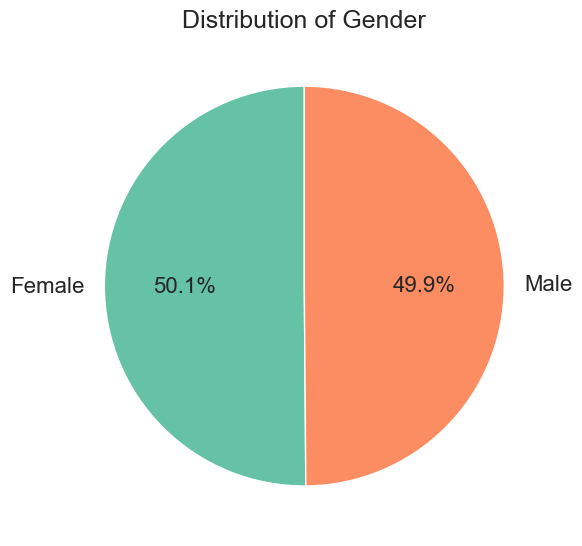

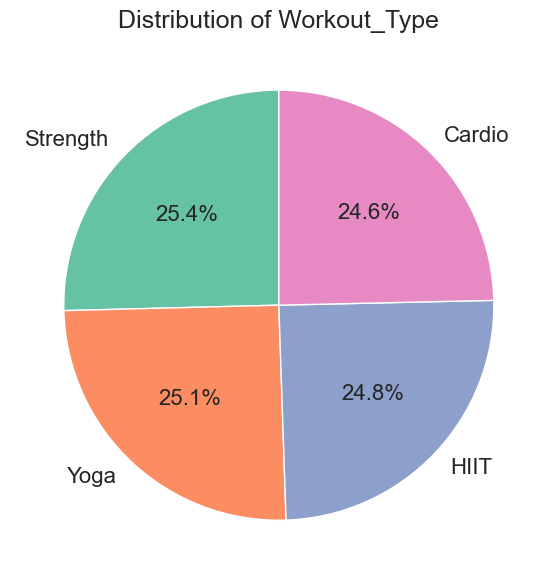

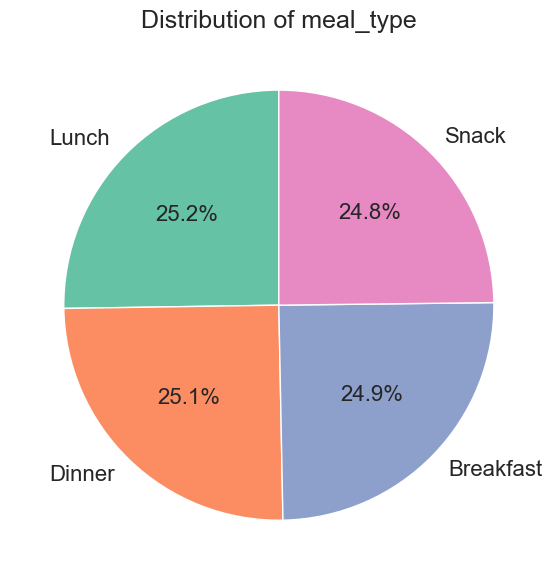

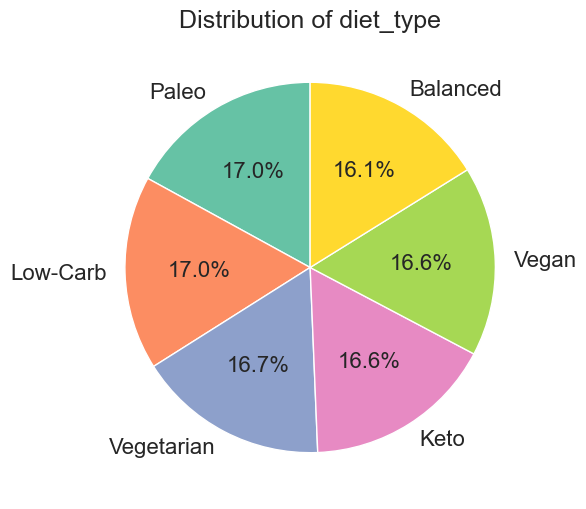

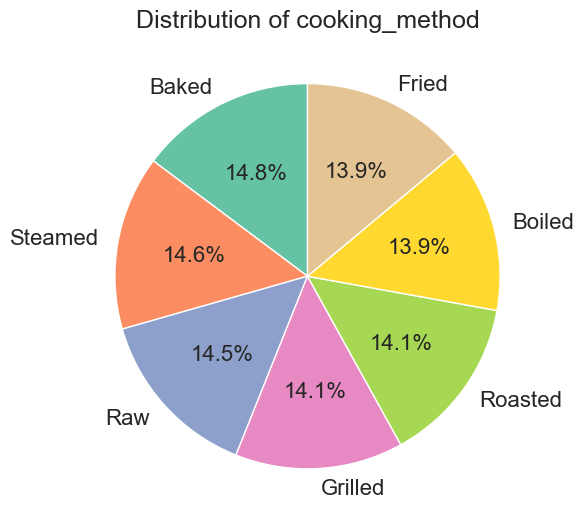

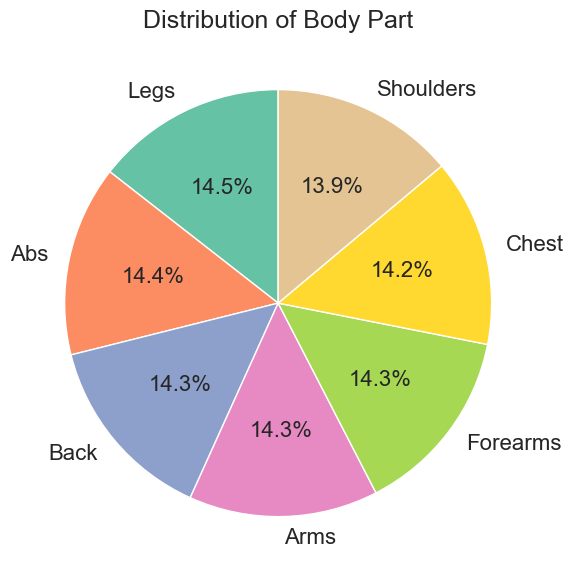

In [16]:
pie_cols = ["Gender", "Workout_Type", "meal_type", "diet_type", "cooking_method", "Body Part"]

for col in pie_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts(dropna=False)
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.tight_layout()
    plt.show()


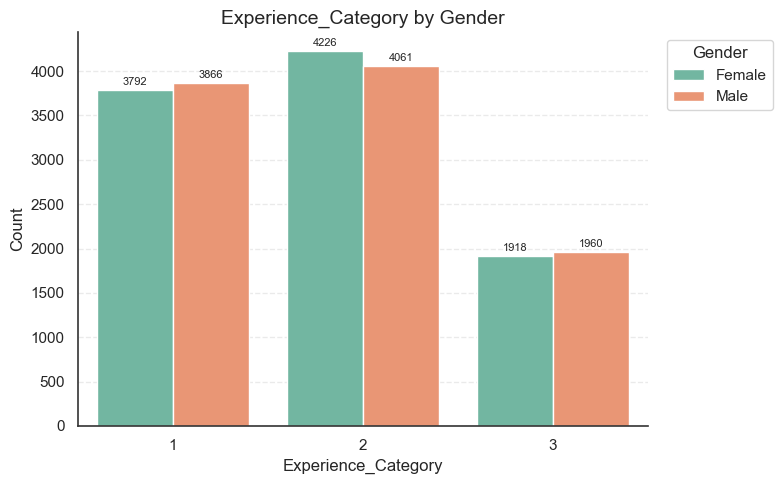

In [17]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df,
    x="Experience_Level",                    
    hue="Gender",
    order=sorted(df["Experience_Level"].unique())
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.title("Experience_Category by Gender")
plt.xlabel("Experience_Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1))
sns.despine()
plt.tight_layout()
plt.show()


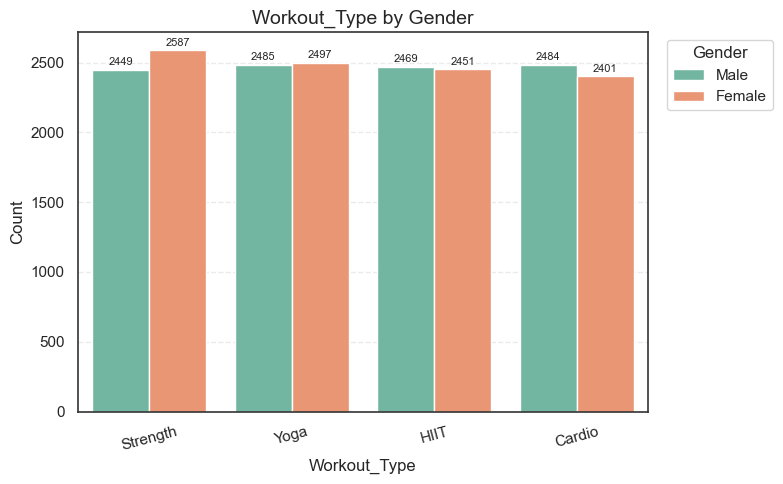

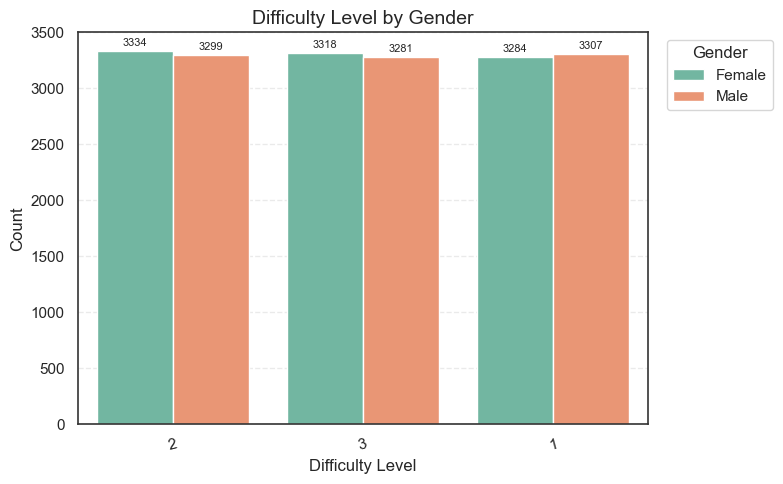

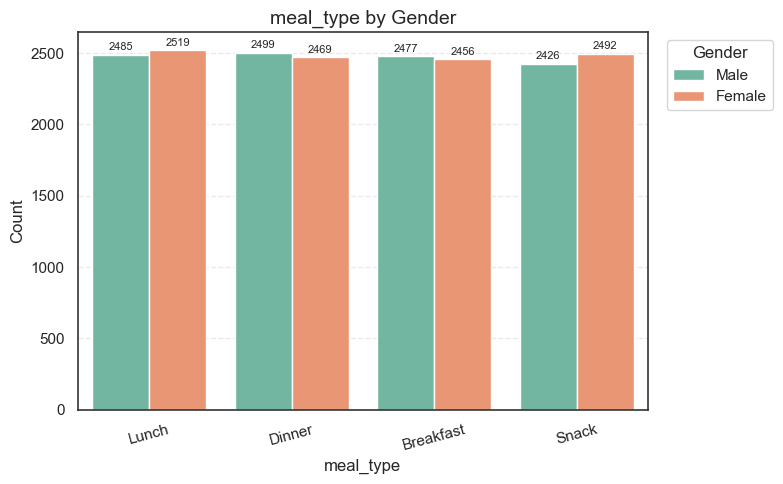

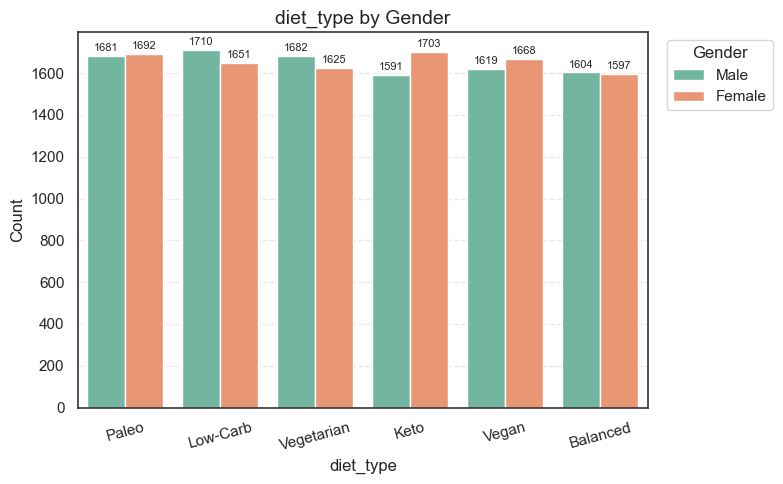

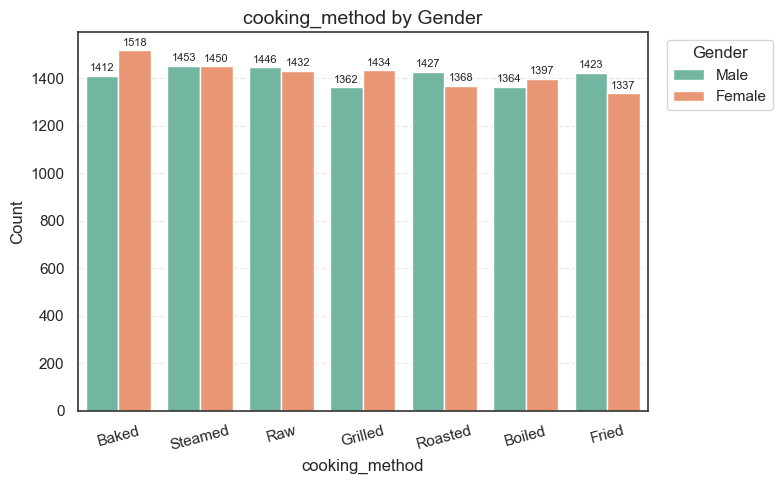

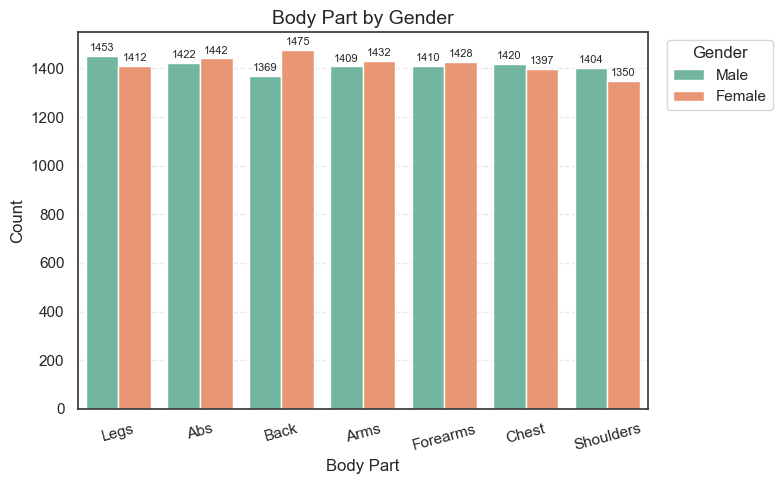

In [18]:
cols_by_gender = ["Workout_Type", "Difficulty Level", "meal_type", "diet_type", "cooking_method", "Body Part"]

for col in cols_by_gender:
    plt.figure(figsize=(8, 5))
    
    ax = sns.countplot(
        data=df,
        x=col,
        hue="Gender",
        order=df[col].value_counts().index
    )
    
    # Add count labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
    plt.title(f"{col} by Gender")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()


### Distributions of original numerical columns 

In [19]:
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
            'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days)', 'BMI', 
            'Daily meals frequency', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_g', 
            'cholesterol_g', 'serving_size_g', 'rating', 'Sets', 'Reps', 
            'Burns Calories (per 30 min)']

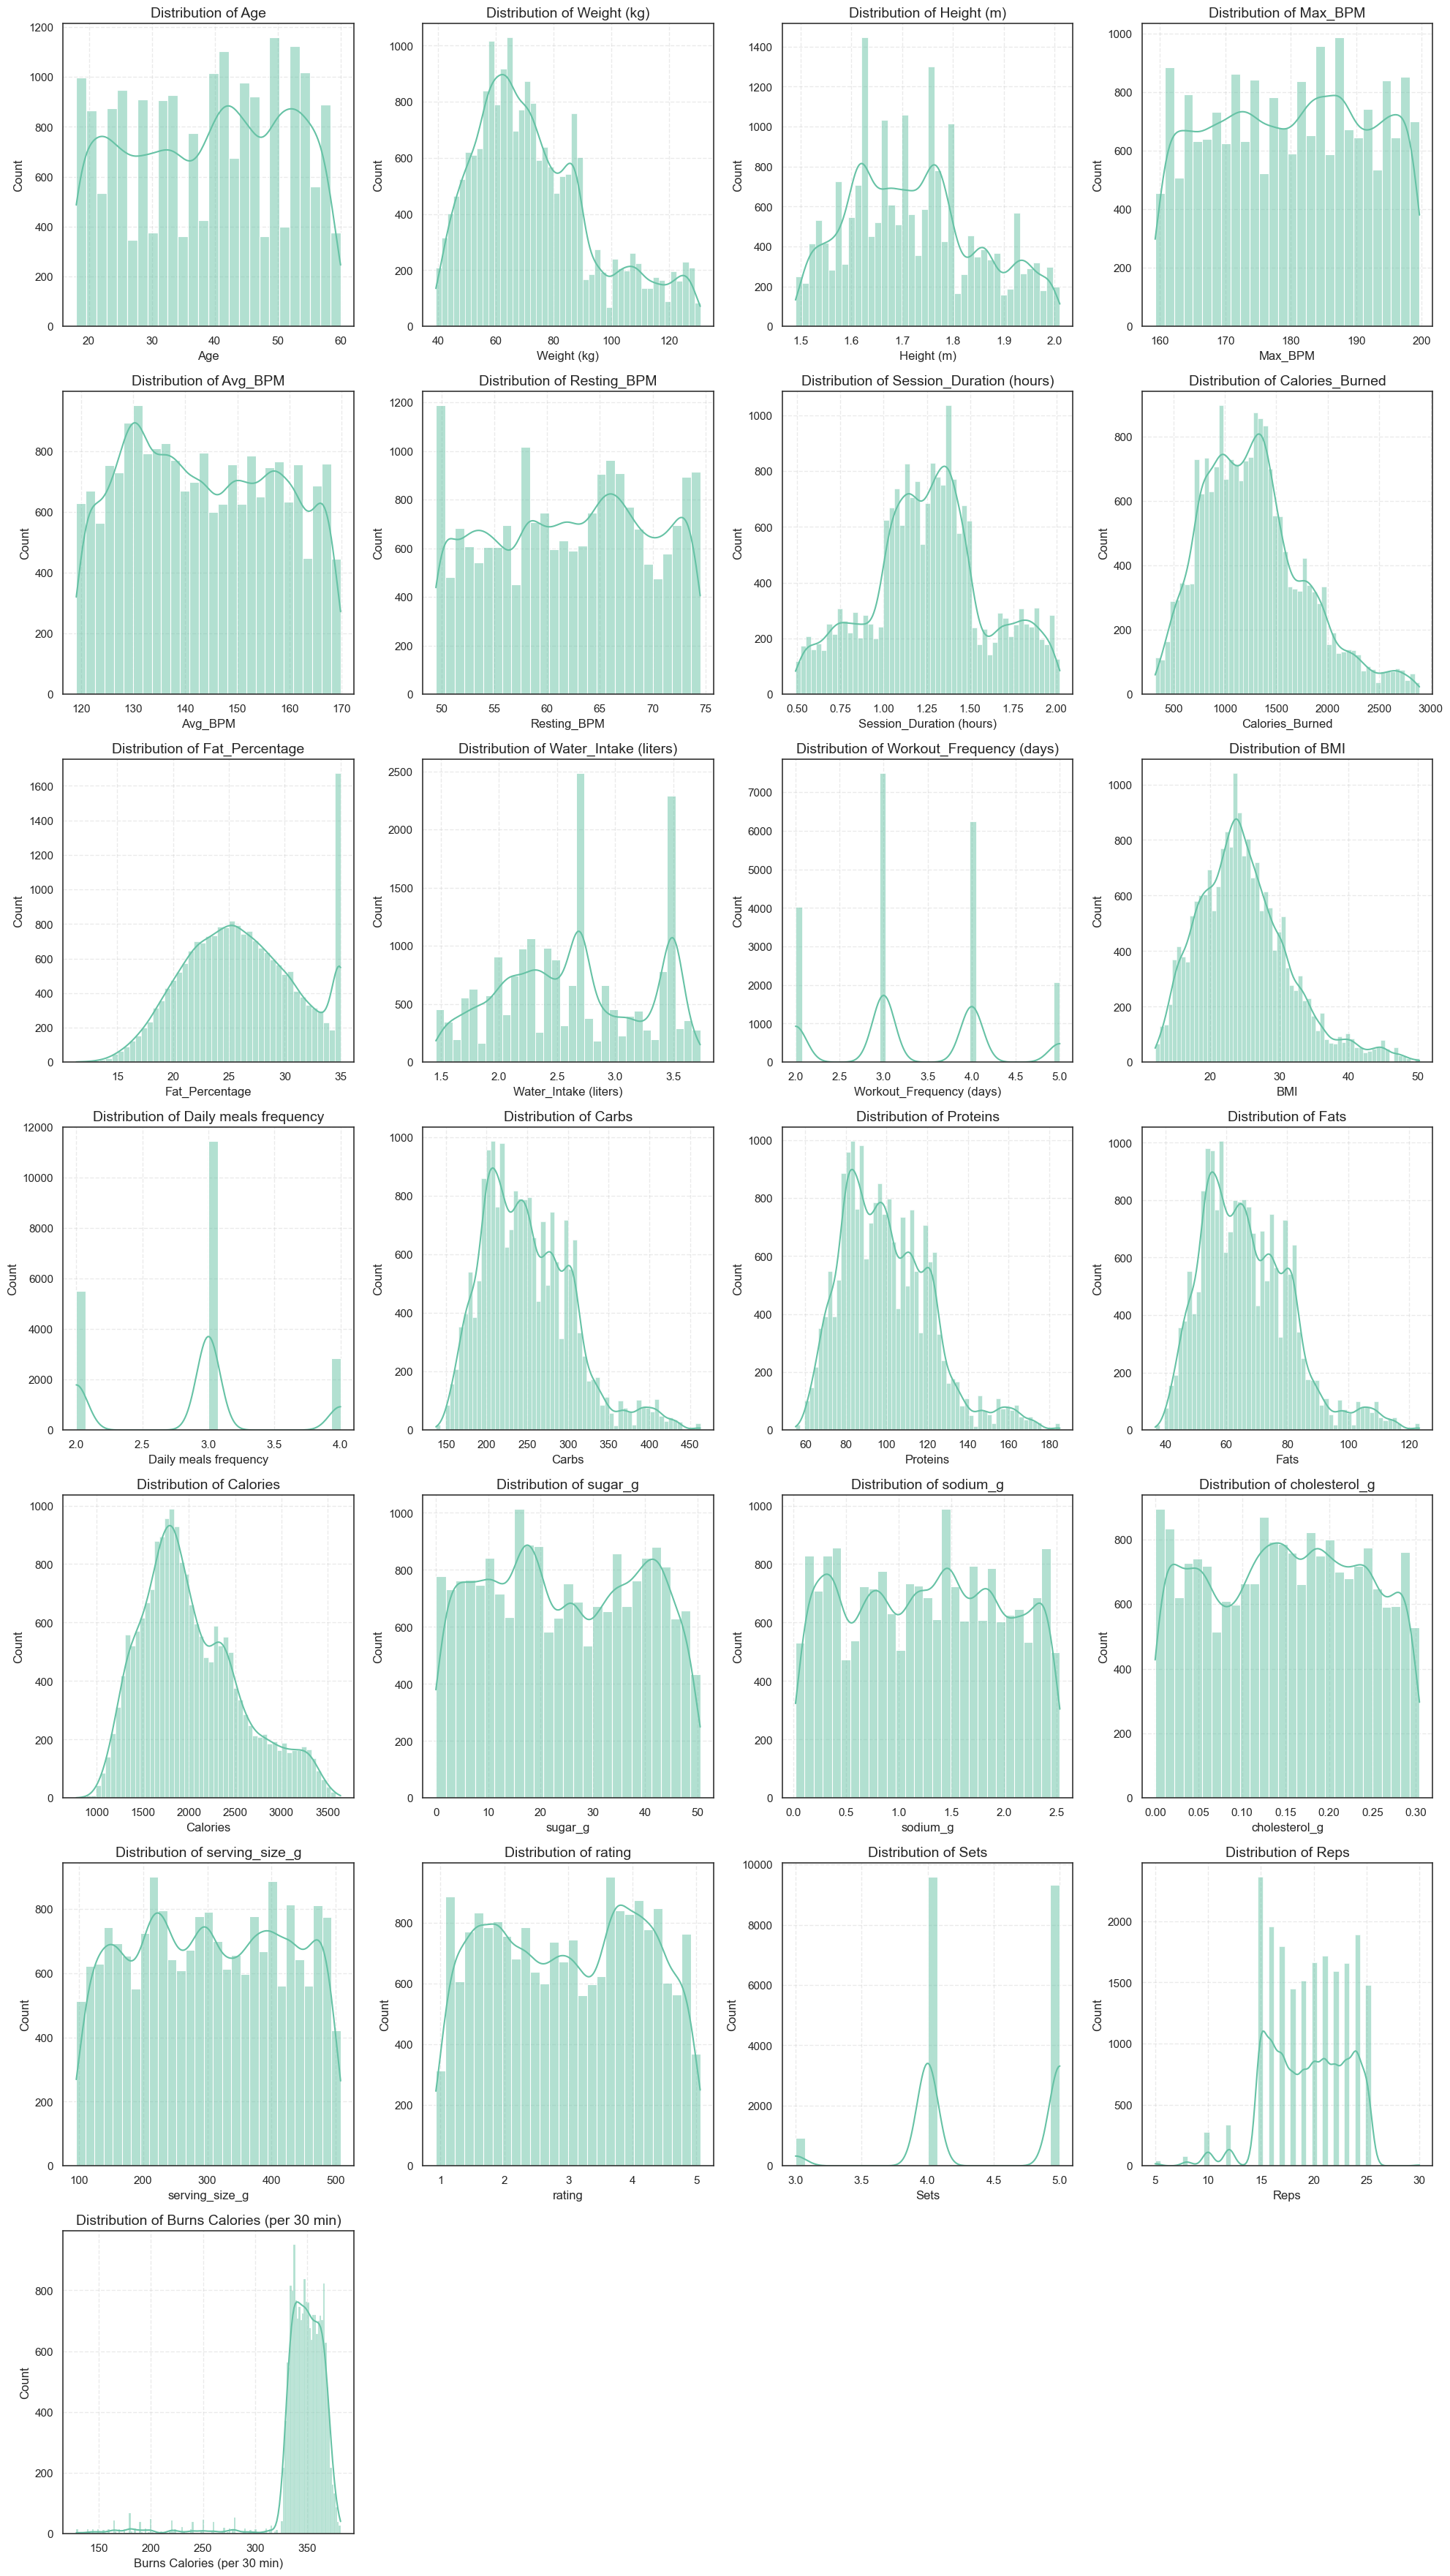

In [20]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(num_cols, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df[col], kde=True) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

Most popular values for categorical attributes with a lot of possible values

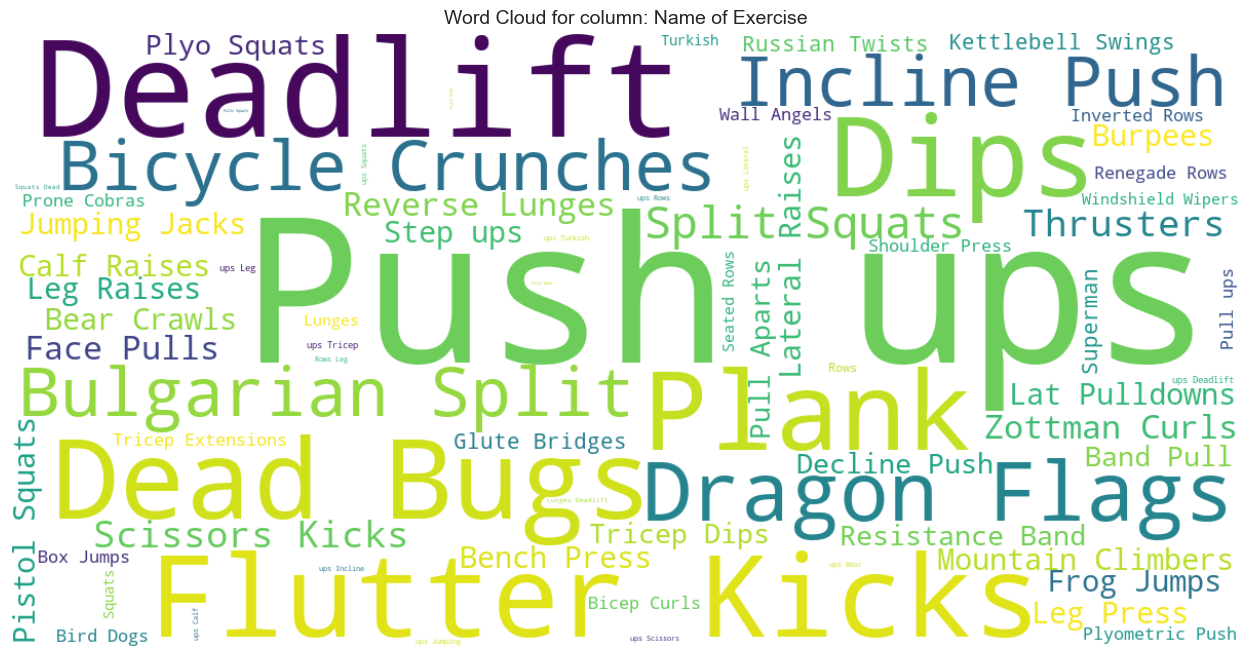

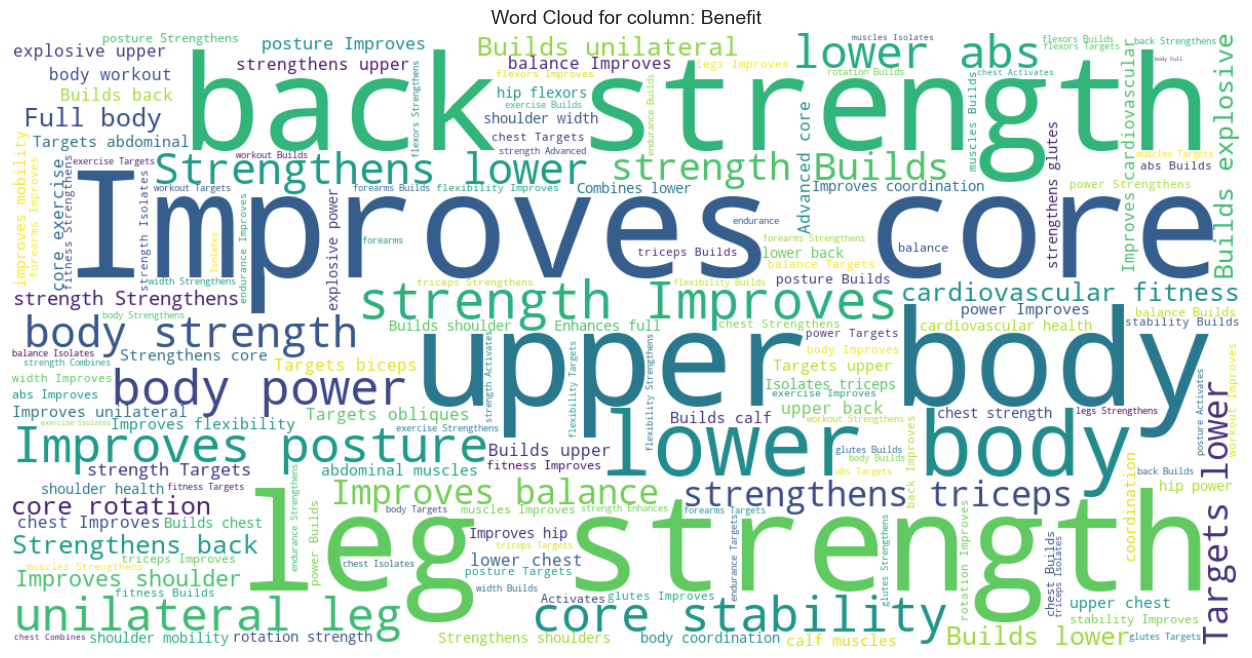

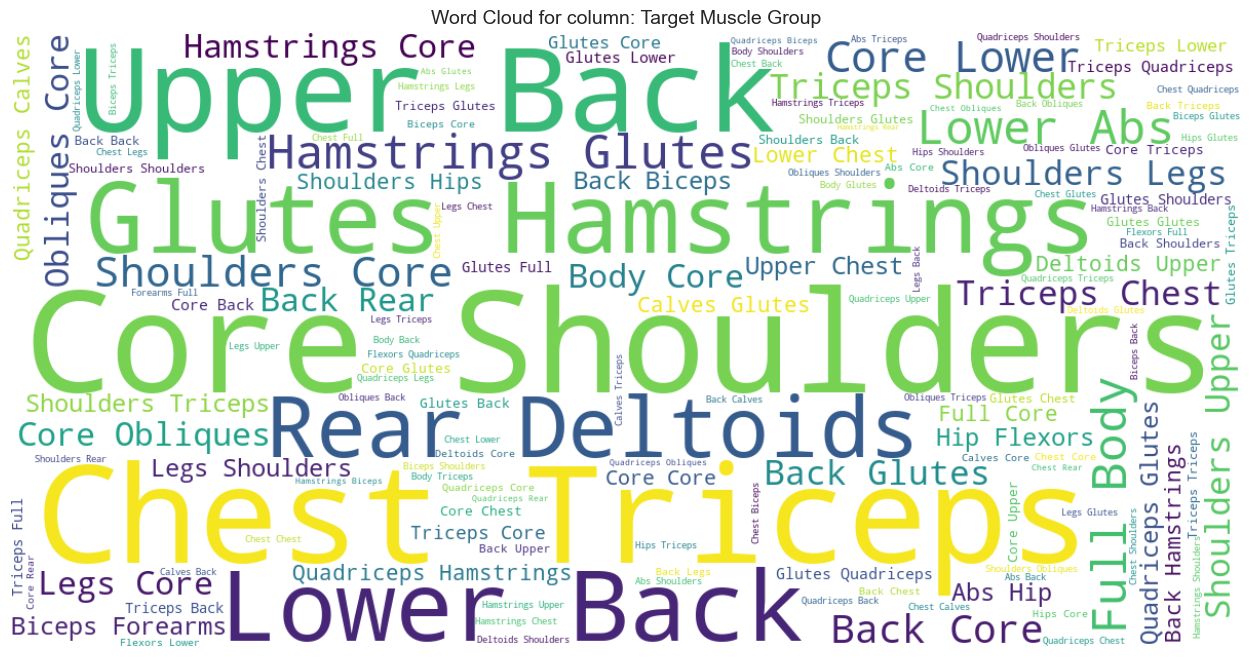

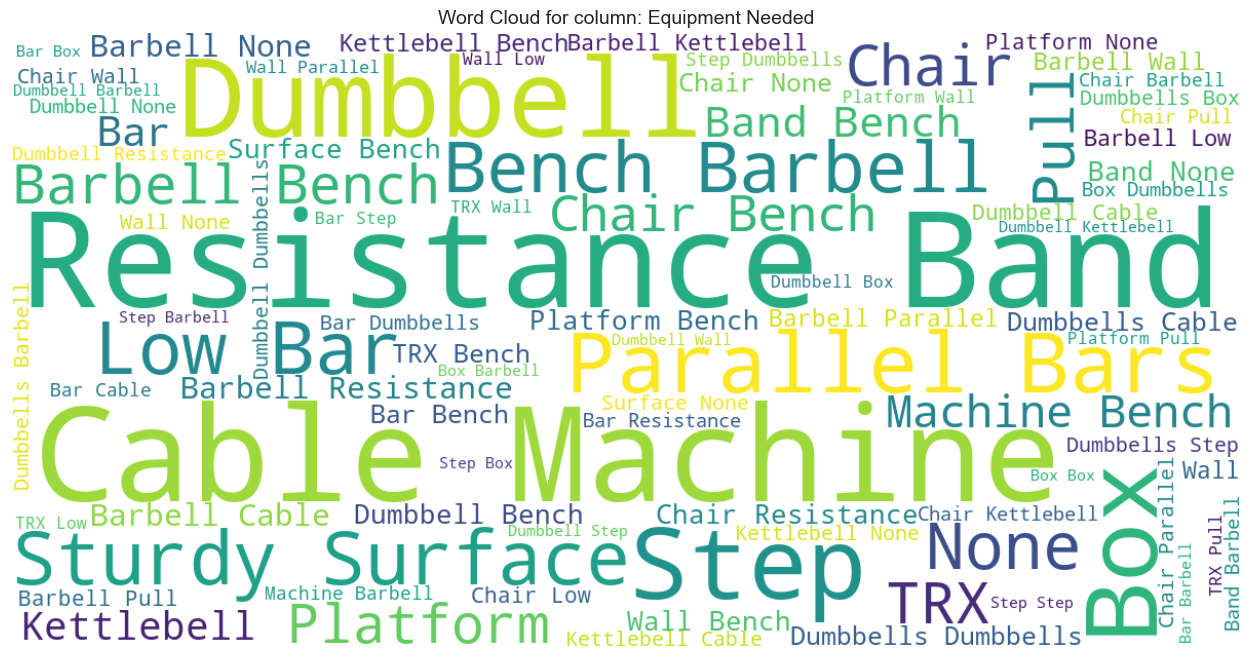

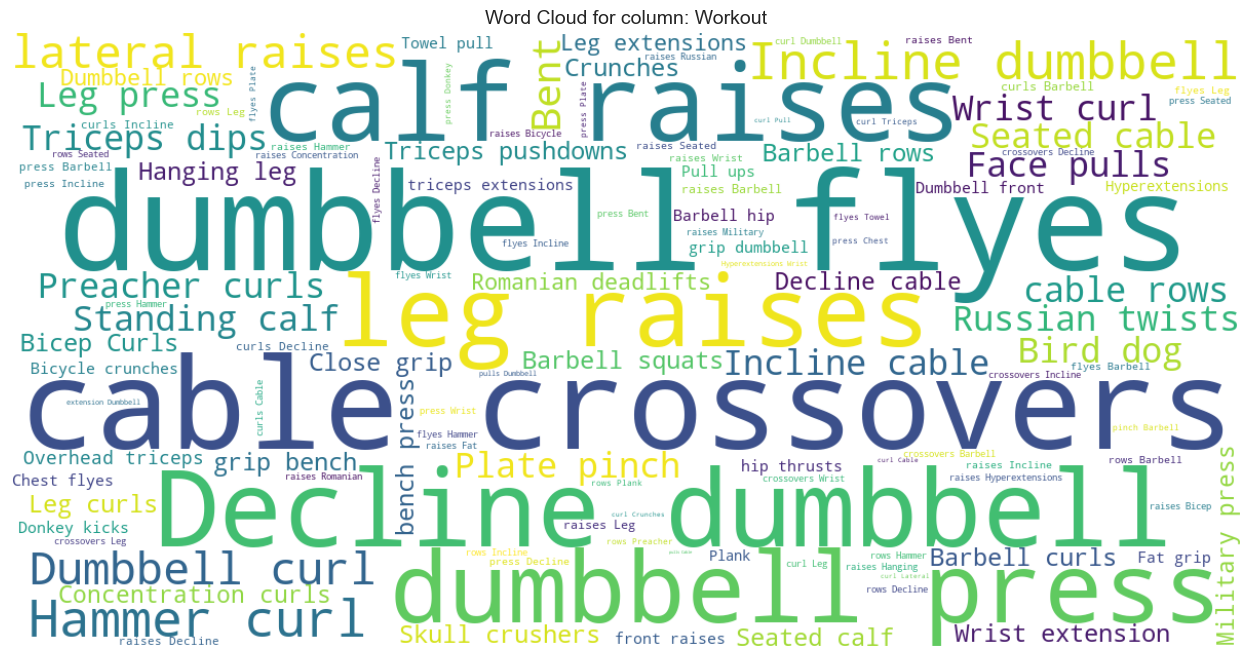

In [21]:
columns = ['Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Workout']

for column in columns:
    text = " ".join(df[column].astype(str).dropna().tolist())
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for column: {column}")
    plt.show()

## Outliers Analysis

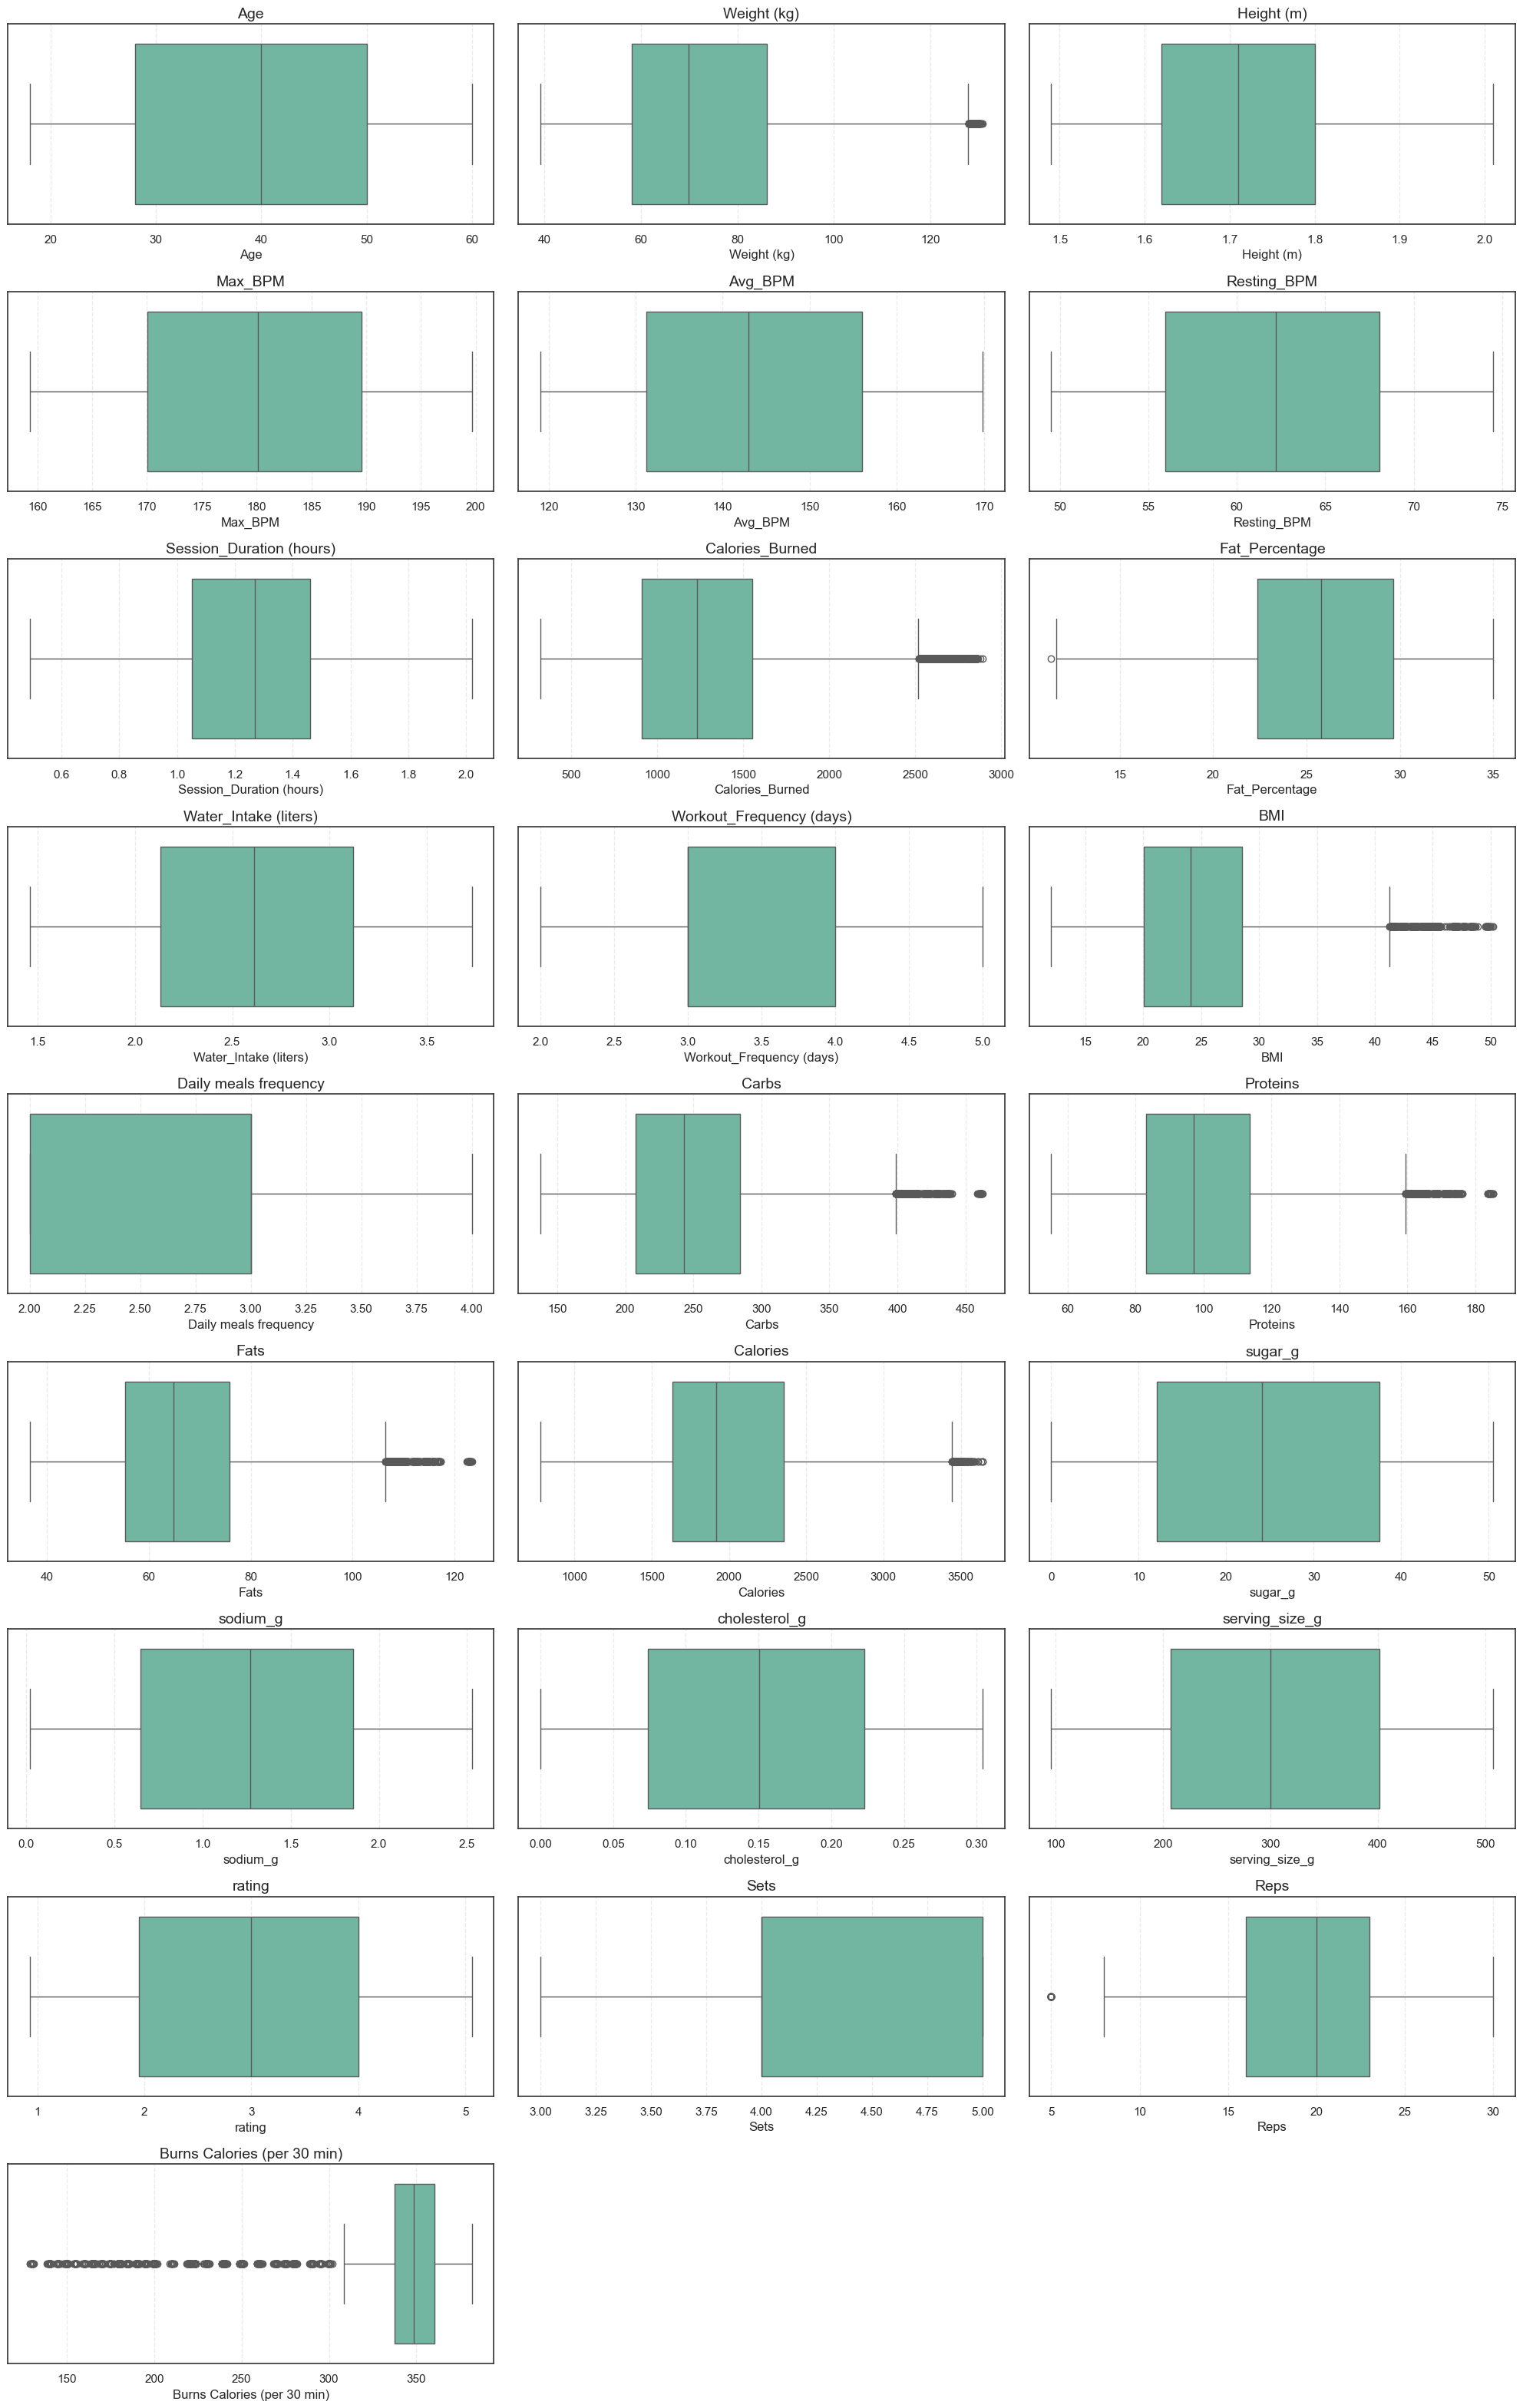

In [22]:
plt.figure(figsize=(20, 45))
for i, col in enumerate(num_cols, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

Weight (kg) - We should not remove outliers in weight because these extreme values represent real clients, and removing them could make the model ignore people with very high weight. Weight is critical for calculating calories, BMI, and personalized recommendations.

Сalories_burned and Calories - Big outliers can dominate model training if we don’t handle them. Standardization (z-scaling) puts all values on the same scale. Outliers stay in the data, but their influence is balanced, so the model doesn’t overfit to extreme cases. This way, the model can learn properly from all clients, including those with very high values. (So we are going to use scaling for model preprocessing)

BMI_new - We should keep BMI outliers because they represent real people with very low or very high BMI. Removing them would make the model ignore these clients. Standardization or scaling can handle extreme values without losing important information.

Some values in Cal_blnc are negative and this is normal, because Cal_blnc is the difference between 'Calories' and 'Calories_Burned'. Negative values mean that there is more calories were burned than taken. 

The variable Fat_Percentage shows strong right-end capping at 35%.
Approximately 967 records (7% of dataset) are at this limit, suggesting that higher
values were truncated during data collection or preprocessing. This artificial ceiling
may bias mean and variance statistics; median and lower percentiles are more reliable. So this variable should not be used for regression models.

In [23]:
df['Fat_Percentage'].min(), df['Fat_Percentage'].max()

(11.333133614105773, 35.0)

In [24]:
df['Fat_Percentage'].value_counts().sort_index().tail(5)

Fat_Percentage
34.993773       1
34.994423       1
34.996363       1
34.998845       1
35.000000    1473
Name: count, dtype: int64

In [25]:
df = df.drop(columns=["Fat_Percentage"])

We chose Winsorization for Carbs, Proteins, and Fats because these attributes can have extreme values that are real but rare, like very large portion sizes. Removing them would lose important information, while leaving them as-is could make the model too sensitive to outliers. Winsorization reduces the influence of these extreme values by capping them at a chosen percentile, keeping most of the data intact. This way, the model can learn patterns from typical values without being dominated by rare extremes.

In [26]:
df['Carbs_winsor'] = winsorize(df['Carbs'], limits=[0.05, 0.05])
df['Proteins_winsor'] = winsorize(df['Proteins'], limits=[0.05, 0.05])
df['Fats_winsor'] = winsorize(df['Fats'], limits=[0.05, 0.05])

print(df[['Carbs', 'Carbs_winsor', 'Proteins', 'Proteins_winsor', 'Fats', 'Fats_winsor']].head())

    Carbs  Carbs_winsor  Proteins  Proteins_winsor   Fats  Fats_winsor
0  267.68        267.68    106.05           106.05  71.63        71.63
1  214.32        214.32     85.41            85.41  56.97        56.97
2  246.04        246.04     98.11            98.11  65.48        65.48
3  203.22        203.22     80.84            80.84  54.56        54.56
4  332.79        332.79    133.05           133.05  88.43        88.43


In [27]:
# Drop old versions
df.drop(['Carbs', 'Proteins', 'Fats'], axis=1, inplace=True)

# Rename the winsorized columns back to original names
df.rename(columns={
    'Carbs_winsor': 'Carbs',
    'Proteins_winsor': 'Proteins',
    'Fats_winsor': 'Fats'
}, inplace=True)

### Distribution of Numerical columns with handled outliers

In [28]:
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
            'Calories_Burned', 'Water_Intake (liters)', 'Workout_Frequency (days)', 'BMI', 
            'Daily meals frequency', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_g', 
            'cholesterol_g', 'serving_size_g', 'rating', 'Sets', 'Reps', 
            'Burns Calories (per 30 min)']

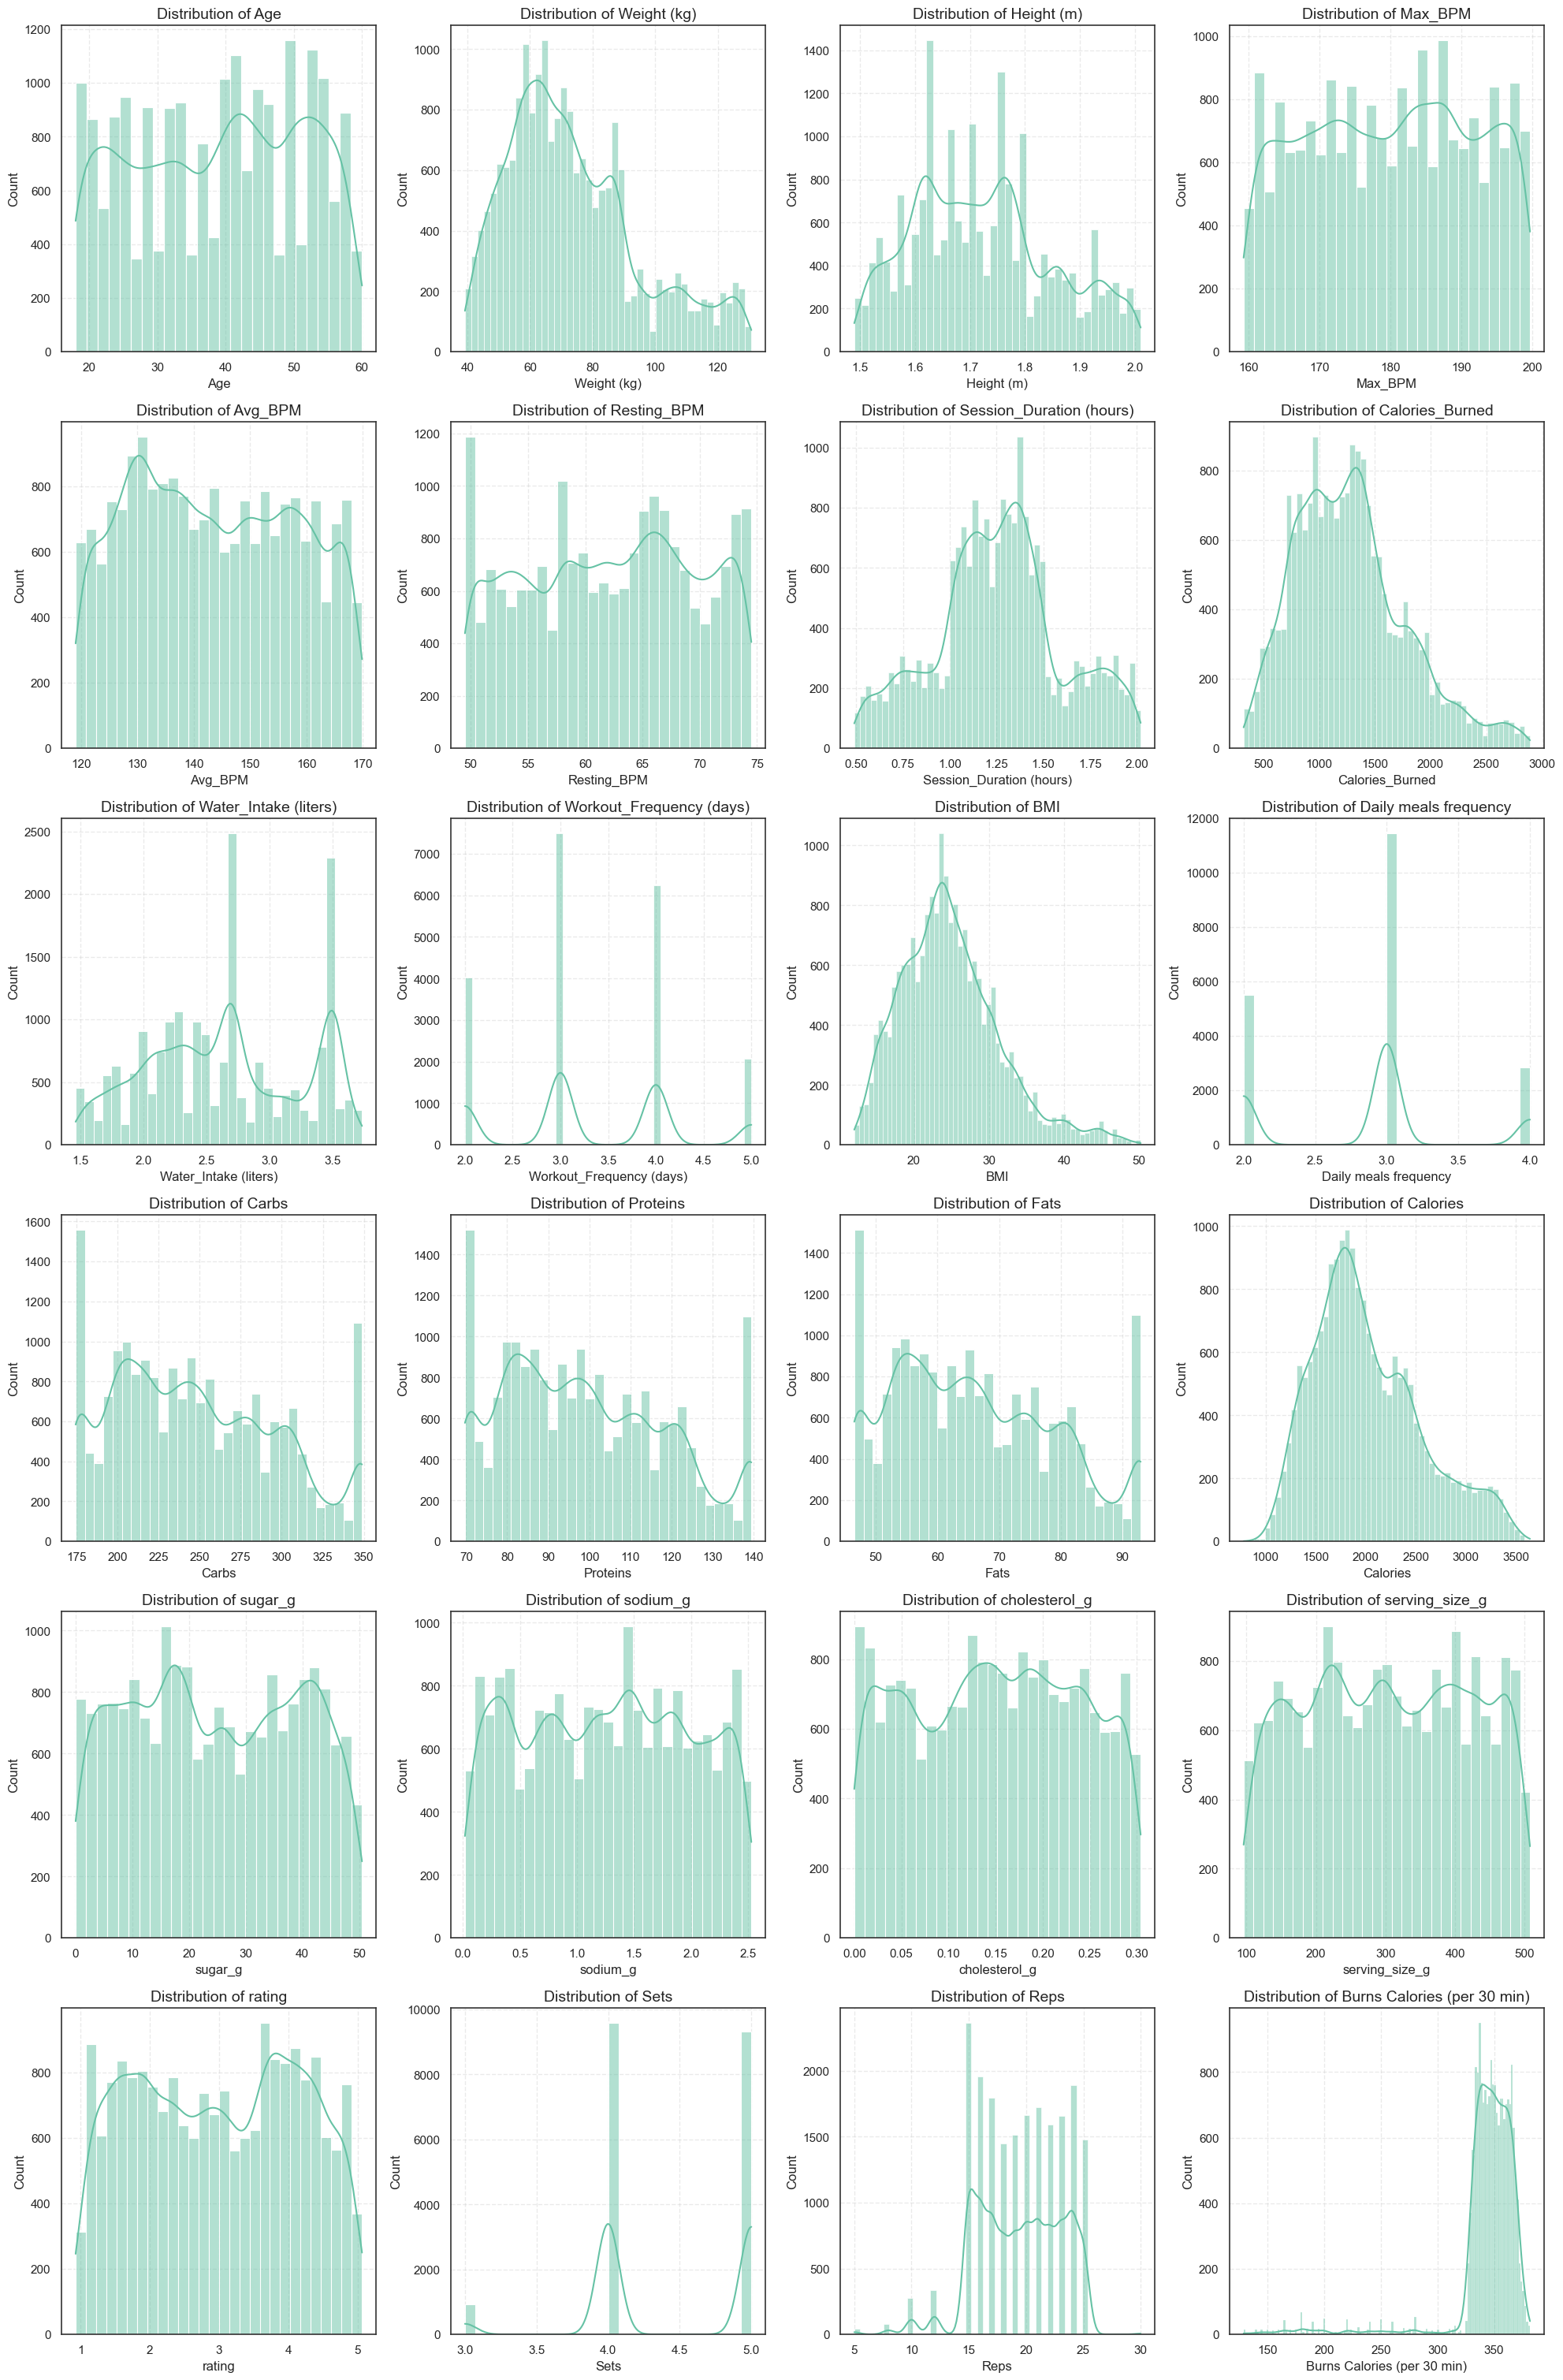

In [29]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(num_cols, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df[col], kde=True) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [30]:
df.to_csv('data/preprocessed_without_scaling.csv', index=False)

### Analysis and Insights from Data

In [31]:
workout_relation = ['Age', 'BMI', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days)', 'Burns Calories (per 30 min)', 'rating', 'Water_Intake (liters)']

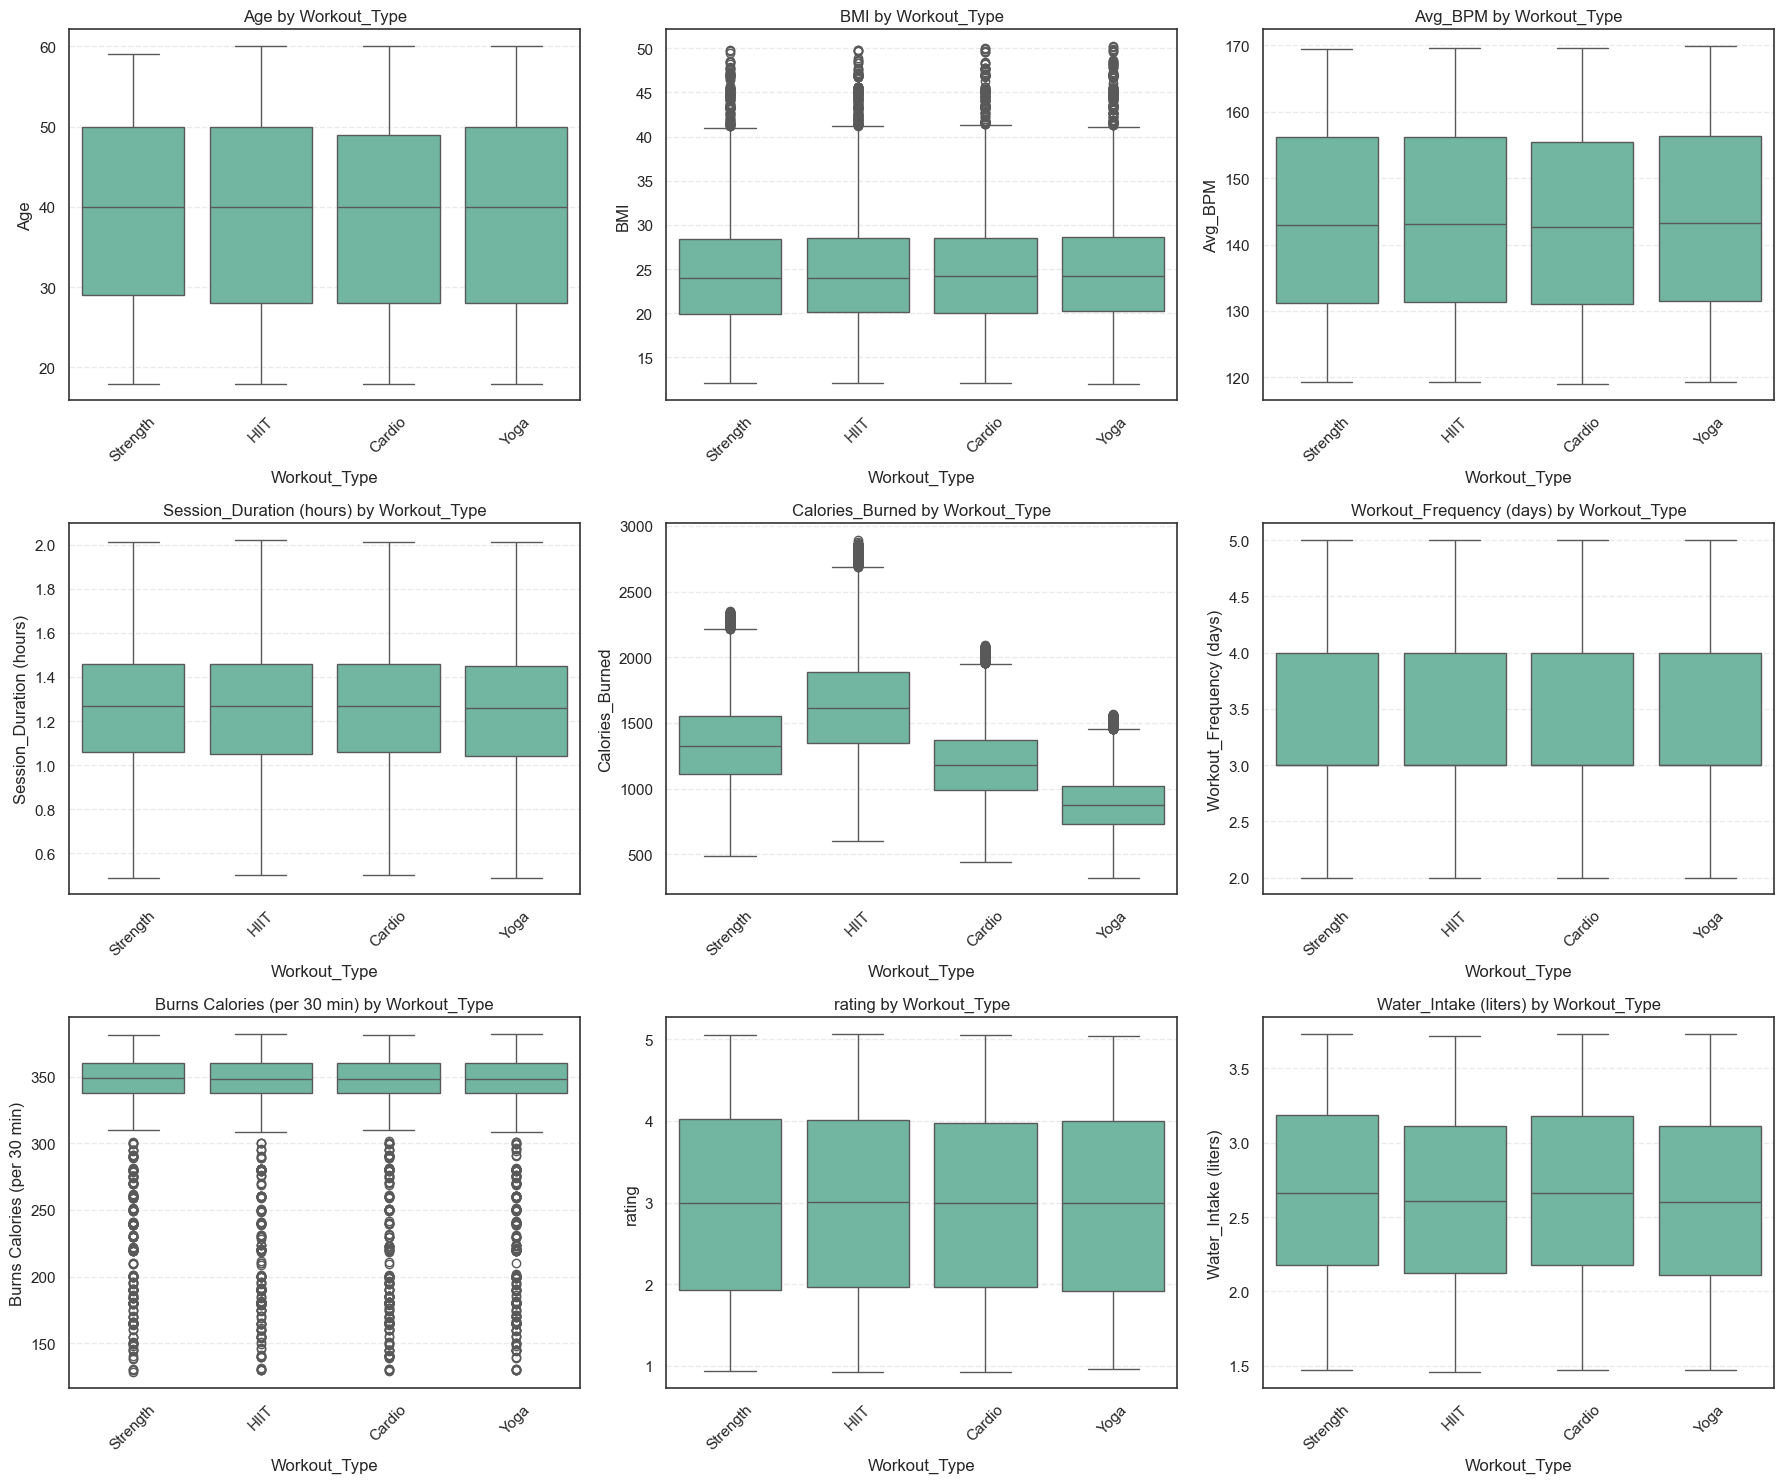

In [32]:
n_cols = 3
n_rows = int(np.ceil(len(workout_relation) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(workout_relation):
    sns.boxplot(data=df, x='Workout_Type', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Workout_Type", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

Age & Height: Participants across all workout types have similar age distributions — no strong age bias for any category.

BMI: Yoga users tend to have higher BMI variability, while Cardio participants show lower median BMI, indicating a leaner group.

Heart Rate (Avg_BPM): HIIT has the highest median heart rate, reflecting higher workout intensity.

Session Duration: Fairly consistent across workouts (~1–1.2 hours), suggesting similar training time habits.

Calories Burned: HIIT shows the highest median calories burned, followed by Strength; Yoga burns the least — aligns with intensity differences.

Workout Frequency: Fairly uniform (3–4 days/week), meaning most users maintain similar weekly exercise routines.

Burns Calories (per 30 min): HIIT consistently outperforms other types, confirming its high-intensity nature.

Rating: Slightly higher ratings for Yoga and Strength, suggesting better user satisfaction.

Water Intake: Similar across all groups, with no workout-type-specific hydration pattern.

Summary:
HIIT is the most intense and calorie-demanding workout type, Strength ranks second, and Yoga shows higher BMI and satisfaction but lower calorie burn — reflecting distinct user goals and physical profiles.

In [33]:
workout_relation = ['Age', 'BMI', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days)', 'Burns Calories (per 30 min)', 'rating', 'Water_Intake (liters)']

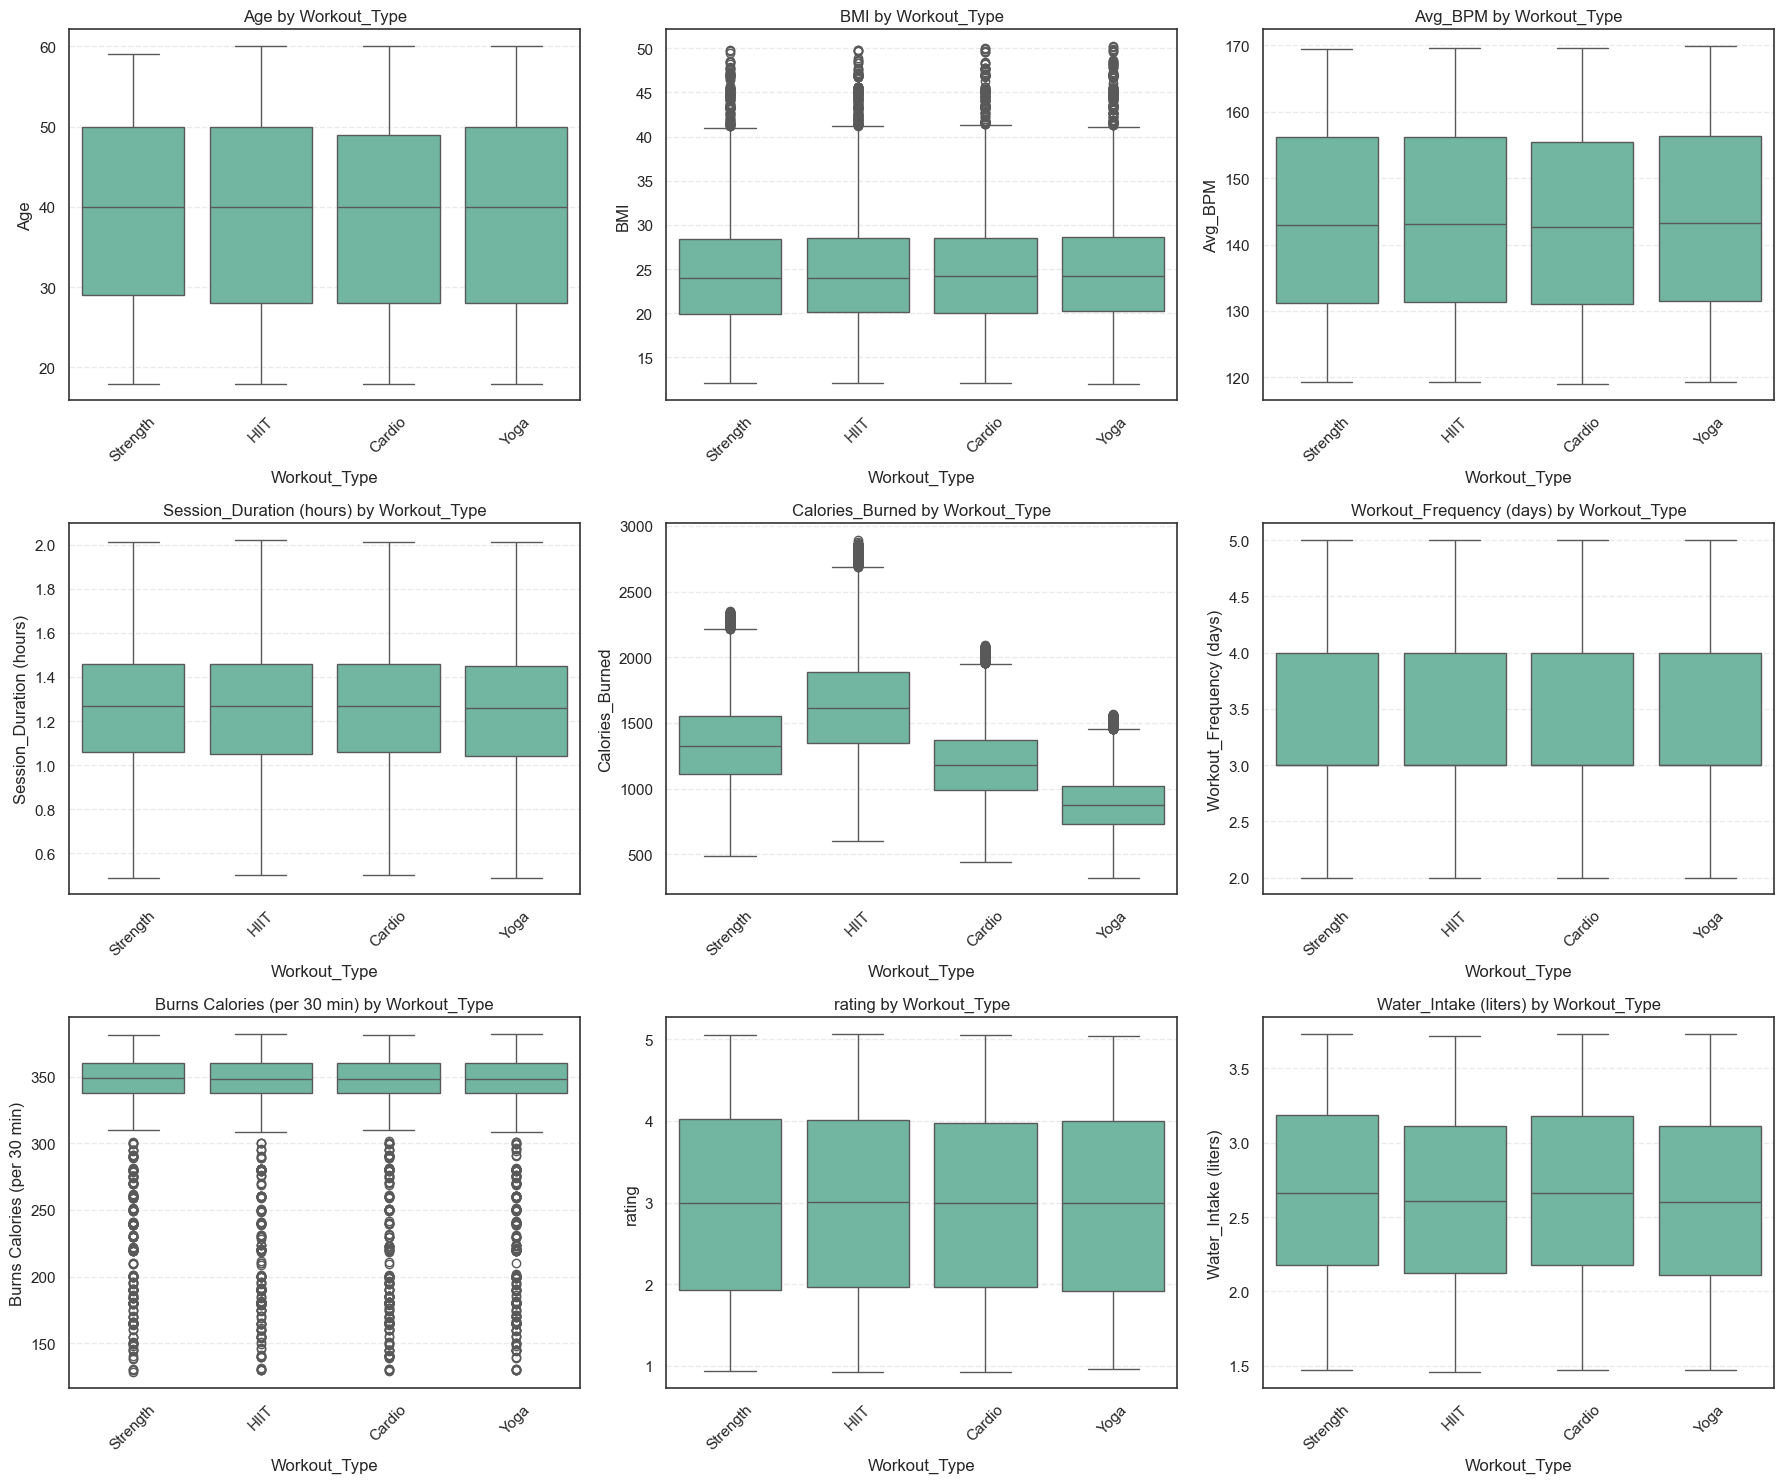

In [34]:
n_cols = 3
n_rows = int(np.ceil(len(workout_relation) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(workout_relation):
    sns.boxplot(data=df, x='Workout_Type', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Workout_Type", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)


# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The ANOVA results indicate that only three numerical features **`Burn_Cal_per30min`**, **`Calories_Burned`**, and **`Cal_blnc`** show statistically significant differences across workout types (p ≈ 0.000). This means these variables are the main quantitative factors distinguishing one workout category from another. All other features have p-values greater than 0.05, suggesting that their averages remain relatively similar regardless of the workout type. In short, the variation between different workouts in this dataset is primarily explained by **how many calories are burned and the resulting calorie balance**, rather than by body composition, nutrition, or demographic factors.

In [35]:
anova_results = []

for col in num_cols:
    groups = [df[df['Workout_Type'] == w][col].dropna()
              for w in df['Workout_Type'].unique()]
    stat, p = f_oneway(*groups)
    anova_results.append({'Feature': col, 'F-statistic': stat, 'p-value': p})

anova_df = pd.DataFrame(anova_results).sort_values('p-value')
display(anova_df)


Feature  F-statistic   p-value
7               Calories_Burned  2757.808692  0.000000
1                   Weight (kg)     2.456381  0.061050
4                       Avg_BPM     2.413639  0.064635
22                         Reps     2.345249  0.070801
15                     Calories     2.313654  0.073838
8         Water_Intake (liters)     2.001794  0.111386
5                   Resting_BPM     1.859778  0.134007
10                          BMI     1.848148  0.136042
18                cholesterol_g     1.788875  0.146875
19               serving_size_g     1.581784  0.191458
6      Session_Duration (hours)     1.477621  0.218393
9      Workout_Frequency (days)     1.447993  0.226671
21                         Sets     1.402576  0.239923
11        Daily meals frequency     1.237464  0.294273
17                     sodium_g     1.034593  0.375924
20                       rating     0.554722  0.644936
23  Burns Calories (per 30 min)     0.481440  0.695183
2                    Height (m)     0.438689  0.725324
16                      sugar_g     0.416691  0.741023
13                     Proteins     0.391190  0.759352
14                         Fats     0.384183  0.764407
12                        Carbs     0.374006  0.771763
3                       Max_BPM     0.324421  0.807721
0                           Age     0.090225  0.965445

The Chi-square test results show that only three categorical variables: Type of Muscle, Equipment Needed, and diet_type have statistically significant associations with the workout type (p < 0.05). This suggests that these features meaningfully differ across workout categories, reflecting logical distinctions such as the muscle groups targeted, the equipment required, and the dietary preferences related to each training type. All other categorical variables, including factors like Gender, Body Part, and Difficulty Level, have high p-values, indicating no strong dependency on workout type. In summary, categorical variation among workouts is mainly driven by muscle involvement, required equipment, and diet type, while other factors remain relatively consistent across classes.

In [36]:
# choose categorical columns without Workout_Type
cat_cols = df.select_dtypes(include='object').columns.drop('Workout_Type')

chi2_results = []

for col in cat_cols:
    table = pd.crosstab(df[col], df['Workout_Type'])
    chi2, p, _, _ = chi2_contingency(table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

# create dataframe with results
chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')

# add significance flag
chi2_df['Significant'] = chi2_df['p-value'] < 0.05

display(chi2_df)


Feature        Chi2   p-value  Significant
7      Equipment Needed   83.796114  0.011956         True
9        Type of Muscle   53.441802  0.030735         True
5               Benefit  161.994469  0.145020        False
2             diet_type   20.477745  0.154362        False
0                Gender    5.165475  0.160074        False
6   Target Muscle Group  115.840849  0.220818        False
8             Body Part   18.321444  0.434673        False
1             meal_type    7.171115  0.619309        False
3        cooking_method   15.358538  0.637219        False
4      Name of Exercise  148.695413  0.765190        False
10              Workout  129.191743  0.942516        False

The statistical analysis showed that these features do not significantly differ across workout types in the dataset. Model trained solely on user-level features would not learn robust underlying patterns and would perform close to a simple baseline, meaning it cannot reliably recommend the “most effective” workout type. 